# exploration

In [1]:
import pandas as pd
df = pd.read_excel("data\combined_randomconfig100,100,2.xlsx")
print(df.shape)
df.info()
df.describe()

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\kian3\AppData\Local\Temp\ipykernel_30328\1840480275.py:2: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_excel("data\combined_randomconfig100,100,2.xlsx")


(312000, 77)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312000 entries, 0 to 311999
Data columns (total 77 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Config_ID       312000 non-null  int64  
 1   demand_pattern  312000 non-null  int64  
 2   policy_id       312000 non-null  object 
 3   C1              312000 non-null  int64  
 4   C2              312000 non-null  int64  
 5   C3              312000 non-null  int64  
 6   C4              312000 non-null  int64  
 7   C5              312000 non-null  int64  
 8   C6              312000 non-null  int64  
 9   C7              312000 non-null  int64  
 10  C8              312000 non-null  int64  
 11  C9              312000 non-null  int64  
 12  C10             312000 non-null  int64  
 13  C11             312000 non-null  int64  
 14  C12             312000 non-null  int64  
 15  C13             312000 non-null  int64  
 16  C14             312000 non-null  int64  
 1

,Config_ID,demand_pattern,C1,C2,C3,C4,C5,C6,C7,C8,...,AggDemandMean,MeanDemand_C12,MeanDemand_C13,MeanDemand_C14,Kappa_P1,Kappa_P2,Kappa_P3,Theta_P1,Theta_P2,Theta_P3
count,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,...,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000,312000.000000
mean,519.500000,49.500000,245.052564,321.676603,267.718269,289.823077,311.362179,79.909295,68.587179,68.209295,...,15.037730,7.022622,4.997788,3.017320,11.638172,8.391357,5.016435,0.599961,0.596641,0.595725
std,300.222482,28.866116,29.693834,44.718983,33.340928,35.960909,38.175268,30.874440,38.135432,55.028363,...,1.365755,1.075130,0.724411,0.457745,1.763261,1.316503,0.766259,0.090089,0.086302,0.087507
min,0.000000,0.000000,165.000000,202.000000,181.000000,193.000000,210.000000,29.000000,21.000000,16.000000,...,11.412864,3.406285,2.418254,1.728238,5.988344,4.664366,2.485527,0.291673,0.238777,0.292314
25%,259.750000,24.750000,223.000000,290.000000,244.000000,264.000000,285.000000,56.000000,40.000000,28.000000,...,14.122070,6.260068,4.519769,2.684800,10.416718,7.548134,4.513833,0.540293,0.540092,0.537444
50%,519.500000,49.500000,243.000000,315.500000,265.500000,287.000000,309.000000,66.000000,47.000000,33.000000,...,15.055078,7.017706,4.978137,3.014923,11.630376,8.384395,5.026097,0.594760,0.594510,0.595404
75%,779.250000,74.250000,263.000000,350.000000,289.000000,312.000000,337.000000,113.000000,113.000000,133.000000,...,15.903015,7.770616,5.487574,3.347080,12.777511,9.286958,5.495795,0.660202,0.652735,0.655914
max,1039.000000,99.000000,379.000000,543.000000,391.000000,443.000000,446.000000,169.000000,175.000000,217.000000,...,19.604209,11.402584,7.009452,4.556437,17.619204,12.302352,7.897999,0.899862,0.889994,0.841975


In [2]:
df = df.drop_duplicates()
print(f"Remaining rows after deduplication: {len(df)}")


Remaining rows after deduplication: 312000


In [3]:
nunique = df.nunique()
print("Constant columns:", nunique[nunique == 1])

Constant columns: Series([], dtype: int64)


In [4]:
df['policy_id'].isin(["policy_random", "policy_echelon", "policy_shortfall"])
Check = df['policy_id'].isin(["policy_random", "policy_echelon", "policy_shortfall"]).count()
print(Check)
df['policy_id'].value_counts()

312000


policy_id
policy_random       104000
policy_echelon      104000
policy_shortfall    104000
Name: count, dtype: int64

In [5]:
cols_with_missing_values = df.columns[df.isna().sum() > 0]
print(f"Columns with missing values: {cols_with_missing_values.tolist()}")

Columns with missing values: []


In [6]:
df = df.drop(columns=["Config_ID", "demand_pattern"])
df = df.drop_duplicates()
print(df.shape)

(312000, 75)


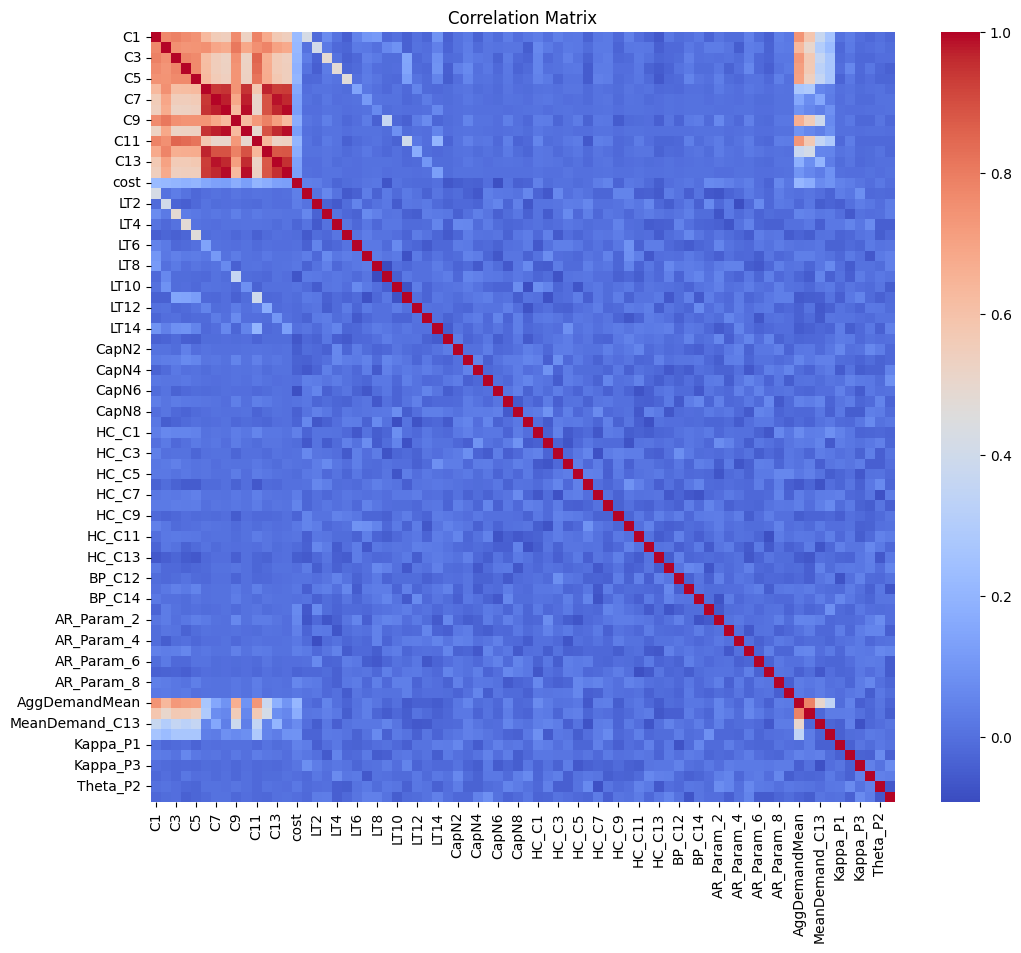

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


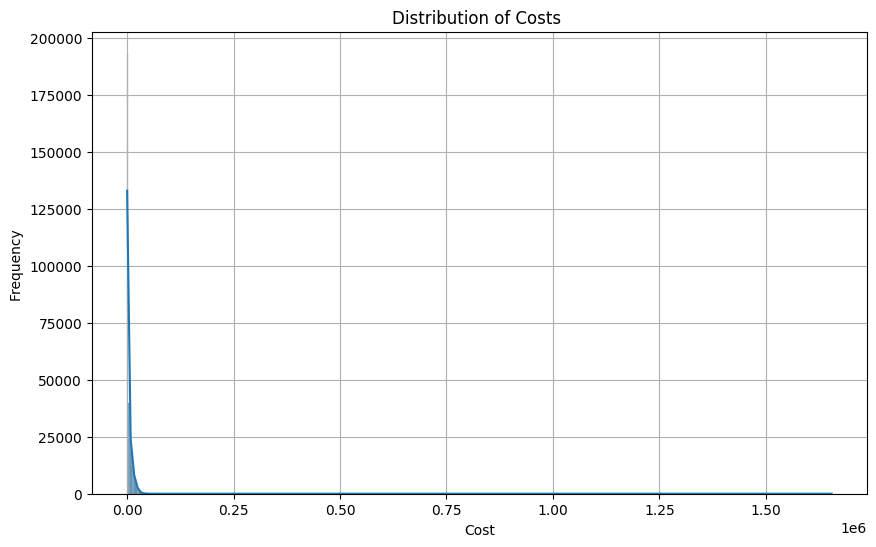

(312000, 75)


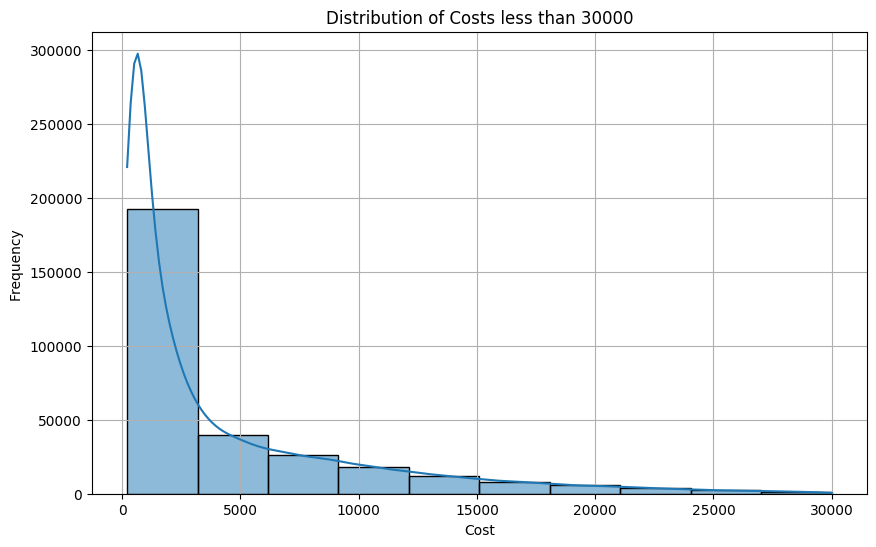

(310018, 75)


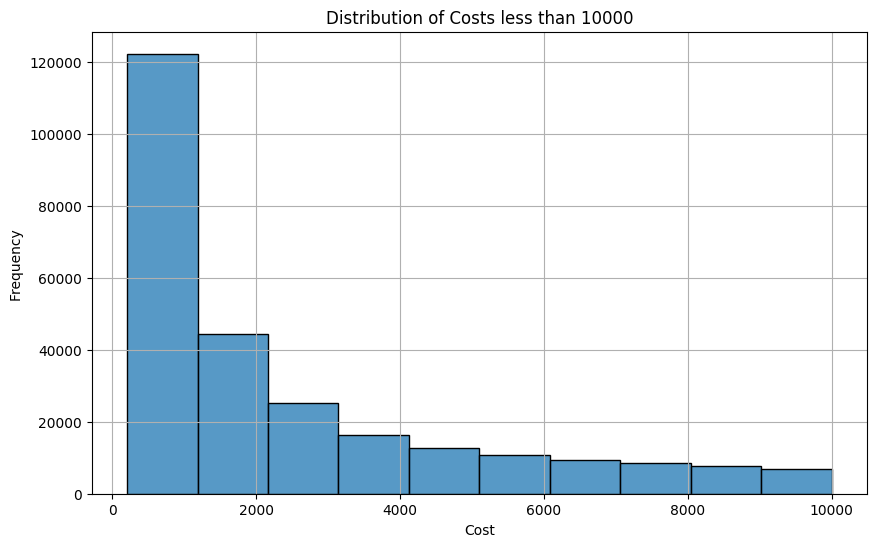

(264393, 75)


In [8]:
# Highly right skewed data, in model fitting use sqrt or log transformation on cost to reduce skewness and improve model performance

plt.figure(figsize=(10, 6))
sns.histplot(df['cost'], binwidth=3000, kde=True)
plt.title("Distribution of Costs ")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()
print(df.shape)

df1 = df[df['cost'] < 30000]  # Filter out extreme values for better visualization
plt.figure(figsize=(10, 6))
sns.histplot(df1['cost'], binwidth=3000, kde=True)
plt.title("Distribution of Costs less than 30000")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()
print(df1.shape)

df2 = df[df['cost'] < 10000]  # Filter out extreme values for better visualization
plt.figure(figsize=(10, 6))
sns.histplot(df2['cost'], binwidth=1000)
plt.title("Distribution of Costs less than 10000")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()
print(df2.shape) 



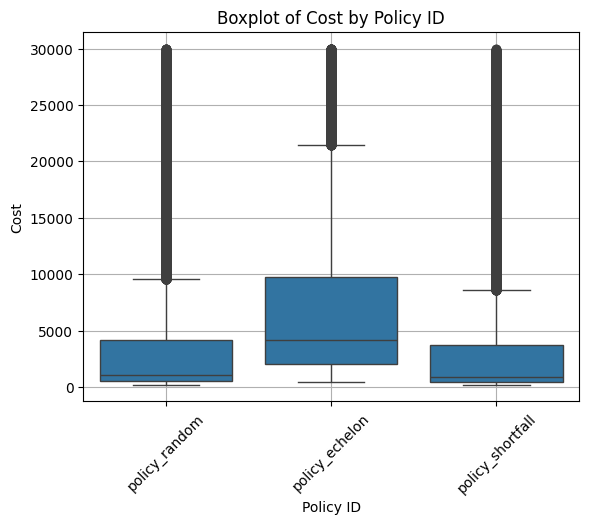

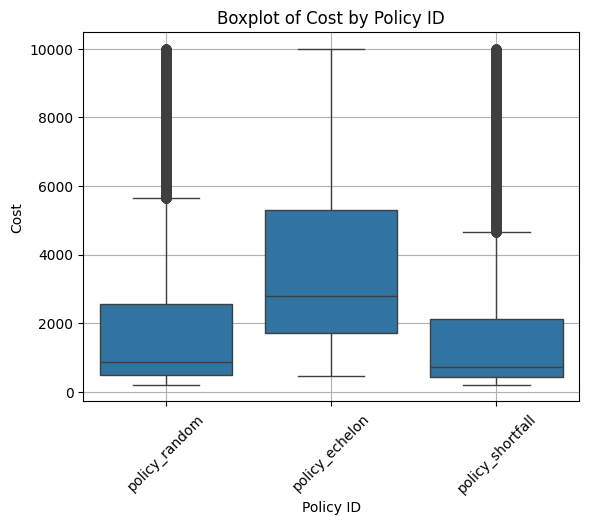

In [9]:
sns.boxplot(data=df1, y="cost", x="policy_id")
plt.title("Boxplot of Cost by Policy ID")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

sns.boxplot(data=df2, y="cost", x="policy_id")
plt.title("Boxplot of Cost by Policy ID")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 


In [10]:
print(df.groupby("policy_id").agg({"cost": ["mean", "median", "std", "min", "max"]}))
print(df1.groupby("policy_id").agg({"cost": ["mean", "median", "std", "min", "max"]}))
print(df2.groupby("policy_id").agg({"cost": ["mean", "median", "std", "min", "max"]}))

                         cost                                         \
                         mean       median           std         min   
policy_id                                                              
policy_echelon    7365.608343  4221.076826  16706.609651  463.554798   
policy_random     3783.082866  1053.443155  16154.196749  207.164745   
policy_shortfall  3660.994098   865.595275  16143.332141  211.102672   

                                
                           max  
policy_id                       
policy_echelon    1.654558e+06  
policy_random     1.654234e+06  
policy_shortfall  1.650855e+06  
                         cost                                        \
                         mean       median          std         min   
policy_id                                                             
policy_echelon    6712.932021  4130.944119  6212.220452  463.554798   
policy_random     3356.556438  1046.085947  4835.212239  207.164745   
policy_shortfa

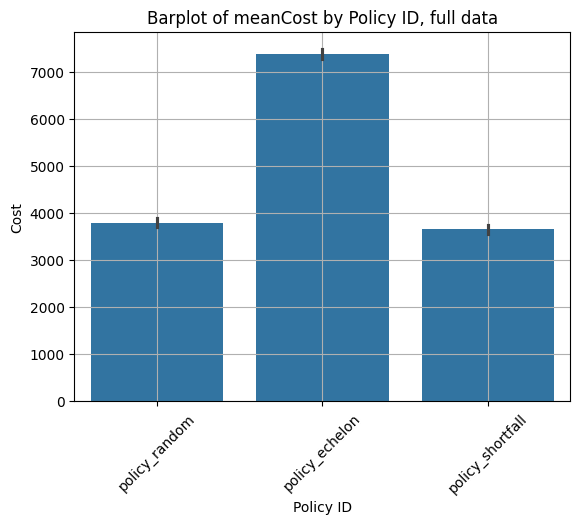

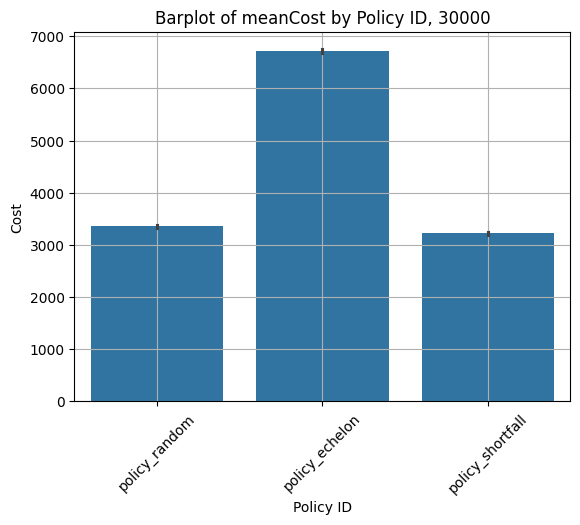

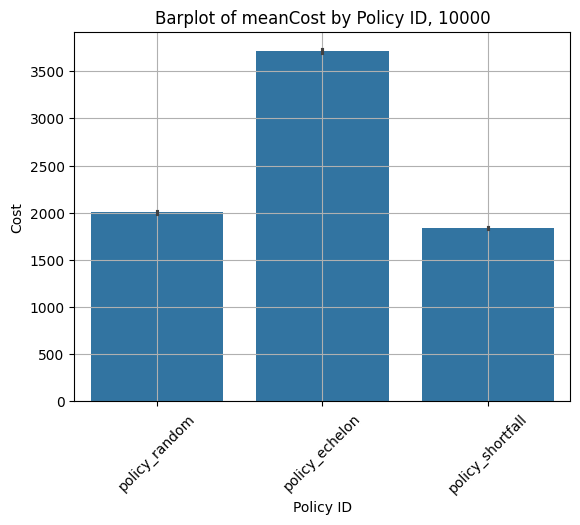

In [11]:
import numpy as np
sns.barplot(data=df, x="policy_id", y="cost")
plt.title("Barplot of meanCost by Policy ID, full data")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

sns.barplot(data=df1, x="policy_id", y="cost")
plt.title("Barplot of meanCost by Policy ID, 30000")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

sns.barplot(data=df2, x="policy_id", y="cost")
plt.title("Barplot of meanCost by Policy ID, 10000")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [12]:
# Very high range of cost value + lot of outliers, so we will remove outliers using IQR method
# This way we can focus on more realitic combinations of parameters and their effect on cost

from scipy.stats import iqr
print(df.shape)
iqr = iqr(df["cost"]) 
lower_treshold = np.quantile(df["cost"], 0.25) - 1.5*iqr 
upper_treshold = np.quantile(df["cost"], 0.75) + 1.5*iqr
print(f"Lower treshold: {lower_treshold}, Upper treshold: {upper_treshold}")
# Identify outliers 
outliers = df[(df["cost"]<lower_treshold) | (df["cost"] > upper_treshold)]
df_no_outliers = df[((df["cost"]>lower_treshold) & (df["cost"] < upper_treshold))]
print(f"Remaining rows after outlier removal: {len(df_no_outliers)}")

(312000, 75)
Lower treshold: -7843.655310292378, Upper treshold: 14800.713789763027
Remaining rows after outlier removal: 287893


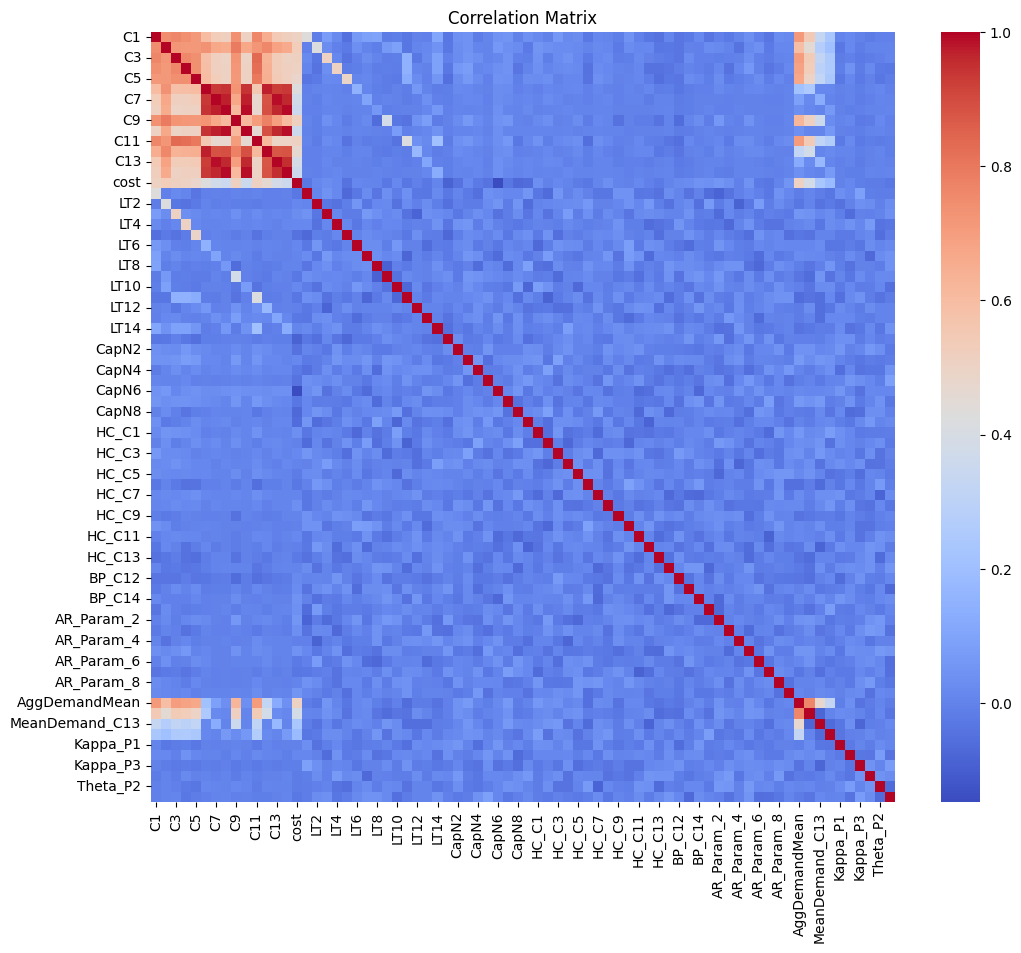

In [13]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
corr = df_no_outliers.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


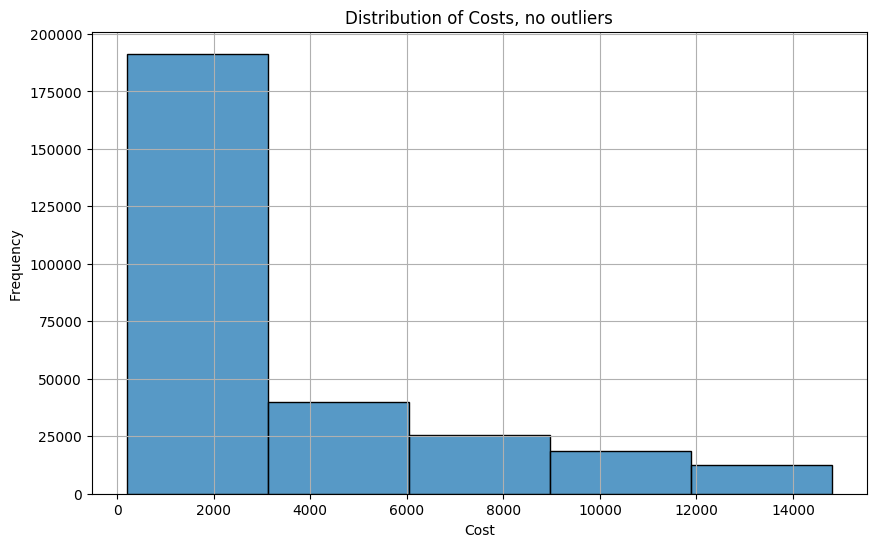

(287893, 75)


In [14]:
# Highly right skewed data, in model fitting use sqrt or log transformation on cost to reduce skewness and improve model performance

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['cost'], binwidth=3000)
plt.title("Distribution of Costs, no outliers")
plt.xlabel("Cost")
plt.ylabel("Frequency ")
plt.grid(True)
plt.show()
print(df_no_outliers.shape)





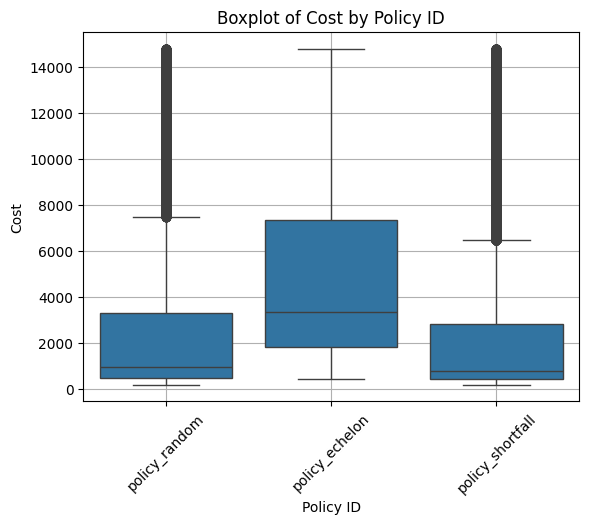

In [15]:
sns.boxplot(data=df_no_outliers, y="cost", x="policy_id")
plt.title("Boxplot of Cost by Policy ID")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 



C:\Users\kian3\AppData\Local\Temp\ipykernel_30328\1054064888.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_no_outliers, x="policy_id", y="cost", ci=None)


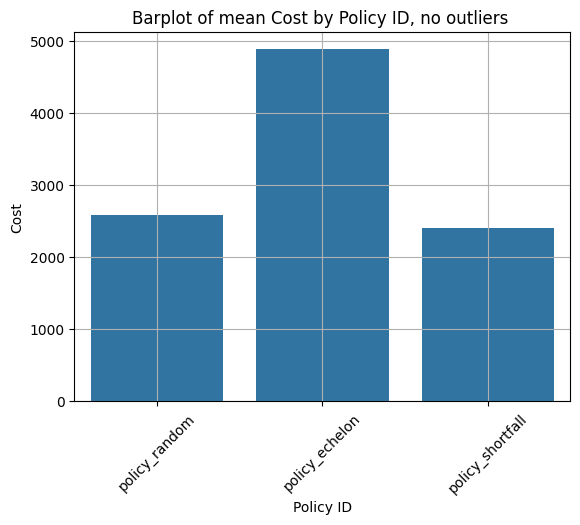

In [17]:
import numpy as np
sns.barplot(data=df_no_outliers, x="policy_id", y="cost", ci=None)
plt.title("Barplot of mean Cost by Policy ID, no outliers ")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\kian3\AppData\Local\Temp\ipykernel_30328\1229314570.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_no_outliers, x="policy_id", y="cost", estimator=np.median, ci = None)


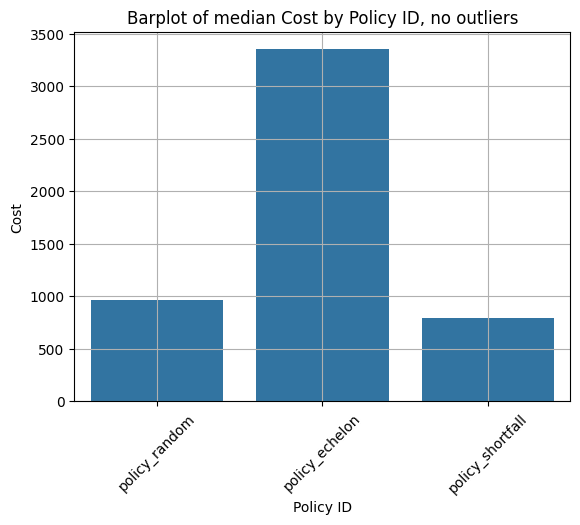

In [18]:
import numpy as np
sns.barplot(data=df_no_outliers, x="policy_id", y="cost", estimator=np.median, ci = None)
plt.title("Barplot of median Cost by Policy ID, no outliers")
plt.xlabel("Policy ID")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [19]:
print(df_no_outliers.groupby("policy_id").agg({"cost": ["mean", "median", "std", "min", "max"]}))


                         cost                                        \
                         mean       median          std         min   
policy_id                                                             
policy_echelon    4880.248072  3350.715994  3764.608461  463.554798   
policy_random     2579.226552   964.180485  3276.622055  207.164745   
policy_shortfall  2405.170602   795.550067  3250.499397  211.102672   

                                
                           max  
policy_id                       
policy_echelon    14800.640407  
policy_random     14799.033461  
policy_shortfall  14800.418411  


# Final model

In [ ]:
# Best model in terms of MAE, used sqrt(cost) as y bcs of highly right skewd data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer


df_cleaned = df_no_outliers.dropna(subset=['cost']).copy()
rows_after_dropping_cost_nan = len(df_cleaned)
print(f"Remaining rows after dropping NaN in cost: {rows_after_dropping_cost_nan}")
df_encoded = pd.get_dummies(df_cleaned, columns=['policy_id'], prefix='policy', dtype=int)

X = df_encoded.drop(columns=["cost"])
y = df_encoded["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y_train_transformed = np.sqrt(y_train)
y_test_transformed = np.sqrt(y_test)

bayes_search = BayesSearchCV(
    xgb.XGBRegressor(objective="reg:squarederror", random_state=42),
    search_spaces={
        'n_estimators': Integer(50, 300),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.005, 0.5, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0),
        'gamma': Real(0.0, 0.5),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
    },
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes_search.fit(X_train, y_train_transformed)
bayes_best = bayes_search.best_estimator_

print("Bayes Search Best CV score (neg_MSE):", bayes_search.best_score_)
print("Bayes Search Best CV score (RMSE):", np.sqrt(-bayes_search.best_score_))

bayes_preds_transformed = bayes_best.predict(X_test)
bayes_preds= bayes_preds_transformed ** 2

bayes_mae = mean_absolute_error(y_test, bayes_preds)
bayes_mse = mean_squared_error(y_test, bayes_preds) 
bayes_rmse = np.sqrt(bayes_mse) 


In [ ]:
print("MAE:", bayes_mae)
print("MSE:", bayes_mse)
print("RMSE:", bayes_rmse)
print("\nBayes Search Best parameters:", bayes_search.best_params_)

MAE: 1022.2223894704454
MSE: 3045397.499878112
RMSE: 1745.106730225436

Random Search Best parameters: OrderedDict({'colsample_bytree': 1.0, 'gamma': 0.279820799667551, 'learning_rate': 0.3815972175125088, 'max_depth': 5, 'n_estimators': 178, 'reg_alpha': 1.0, 'reg_lambda': 0.0, 'subsample': 1.0})


In [ ]:
# Check for overfitting, passed on the untransformed cost, no bayes cv to speed it up
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import cross_val_score


df_cleaned = df_no_outliers.dropna(subset=['cost']).copy()
df_encoded = pd.get_dummies(df_cleaned, columns=['policy_id'], prefix='policy', dtype=int)

X = df_encoded.drop(columns=["cost"])
y = df_encoded["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_bestmodel = xgb.XGBRegressor(random_state=42, objective='reg:squarederror', verbose=1, colsample_bytree=1.0, \
                            gamma=0.279820799667551, learning_rate=0.3815972175125088, max_depth=5, \
                            n_estimators=178, reg_alpha=1.0, reg_lambda=0.0, \
                            subsample=1.0)

xgb_bestmodel.fit(X_train, y_train)
best_preds_untransformed = xgb_bestmodel.predict(X_test)

# Calculate the best CV score using cross-validation
cv_scores = cross_val_score(xgb_bestmodel, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
best_cv_score = -cv_scores.mean()
print("Best CV score (MSE):", best_cv_score)
print("Best CV score (RMSE):", np.sqrt(best_cv_score))

random_mae = mean_absolute_error(y_test, best_preds_untransformed)
random_mse = mean_squared_error(y_test, best_preds_untransformed)

print("\nBayes Search Best Model Evaluation on Test Set:")
print("MAE:", random_mae)
print("MSE:", random_mse)
print("RMSE:", np.sqrt(random_mse))

c:\Users\kian3\Consulting\ORTEC\Consulting\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:13:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\kian3\Consulting\ORTEC\Consulting\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:13:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\kian3\Consulting\ORTEC\Consulting\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:13:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\kian3\Consulting\ORTEC\Consulting\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:13:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" }

Best CV score (MSE): 2982412.8326068814
Best CV score (RMSE): 1726.9663669588015

Bayes Search Best Model Evaluation on Test Set:
MAE: 1042.051653505757
MSE: 2996187.0449189697
RMSE: 1730.9497522802242


In [ ]:
# Run this cell instead of first cell to avoid having to do paramter tuning again (takes long time to run on a CPU)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer


df_cleaned = df_no_outliers.dropna(subset=['cost']).copy()
rows_after_dropping_cost_nan = len(df_cleaned)
print(f"Remaining rows after dropping NaN in cost: {rows_after_dropping_cost_nan}")
df_encoded = pd.get_dummies(df_cleaned, columns=['policy_id'], prefix='policy', dtype=int)

X = df_encoded.drop(columns=["cost"])
y = df_encoded["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y_train_transformed = np.sqrt(y_train)
y_test_transformed = np.sqrt(y_test)

bayes_best = xgb.XGBRegressor(random_state=42, objective='reg:squarederror', verbose=1, colsample_bytree=1.0, \
                            gamma=0.279820799667551, learning_rate=0.3815972175125088, max_depth=5, \
                            n_estimators=178, reg_alpha=1.0, reg_lambda=0.0, \
                            subsample=1.0)

bayes_best.fit(X_train, y_train_transformed)

bayes_preds_transformed = bayes_best.predict(X_test)
bayes_preds= bayes_preds_transformed ** 2

bayes_mae = mean_absolute_error(y_test, bayes_preds)
bayes_mse = mean_squared_error(y_test, bayes_preds) 
bayes_rmse = np.sqrt(bayes_mse) 

print("MAE:", bayes_mae)
print("MSE:", bayes_mse)
print("RMSE:", bayes_rmse)

c:\Users\kian3\Consulting\ORTEC\Consulting\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


MAE: 1022.2223894704454
MSE: 3045397.499878112
RMSE: 1745.106730225436


In [ ]:
import pandas as pd

df_bayes = pd.DataFrame({
    "ActualCost": y_test,
    "PredictedCost": bayes_preds
})
df_bayes.to_csv("bayes_predictions.csv",index=False)

In [ ]:
import pandas as pd

fi = pd.DataFrame({
  "feature": X_train.columns,
  "importance": bayes_best.feature_importances_
}).sort_values("importance", ascending=False)
fi.to_csv("bayes_feature_importance.csv", index=False)

In [ ]:
df = pd.DataFrame({"Actual": y_test, "Pred": bayes_preds})
df["decile"] = pd.qcut(df["Pred"], 10, labels=False) + 1
cum = (
  df.groupby("decile")
    .agg(actual_sum=("Actual","sum"))
    .sort_index()
    .assign(cum_pct=lambda d: d.actual_sum.cumsum()/d.actual_sum.sum())
    .reset_index()
)
cum.to_csv("bayes_cumulative_gain.csv",index=False)

In [29]:
# For original-scale
df_test = pd.DataFrame(X_test, columns=X.columns)
df_test["true_cost"] = y_test.values
df_test["predicted_cost"] = best_preds_untransformed
df_test = df_test.sort_values(by=["predicted_cost", "true_cost"], ascending=[False, False]).set_index(["predicted_cost", "true_cost"])
print(df_test.head(10))


                              C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  \
predicted_cost true_cost                                                        
14445.139648   14765.324129  284  361  336  336  361  129  129  155  129  155   
               13941.788271  284  361  336  336  361  129  129  155  129  155   
               12973.299759  284  361  336  336  361  129  129  155  129  155   
14419.753906   14013.551349  309  449  365  365  421  141  141  169  141  197   
               13324.800661  309  449  365  365  421  141  141  169  141  197   
14100.997070   13512.739392  341  397  369  341  426  142  171  171  142  171   
14085.147461   13623.836256  327  354  354  354  354  136  136  191  109  191   
               13459.469641  327  354  354  354  354  136  136  191  109  191   
               12527.691074  327  354  354  354  354  136  136  191  109  191   
14051.540039   14784.421216  266  342  314  314  362   83   39   25  121   29   

                           

In [30]:
# For sqrt scale
df_test = pd.DataFrame(X_test, columns=X.columns)
df_test["true_cost"] = y_test.values
df_test["predicted_cost"] = bayes_preds
df_test = df_test.sort_values(by=["predicted_cost", "true_cost"], ascending=[False, False]).set_index(["predicted_cost", "true_cost"])
print(df_test.head(10))


                              C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  \
predicted_cost true_cost                                                        
17569.458984   14230.234467  275  375  300  350  350  125  125  150  125  175   
               13045.275879  275  375  300  350  350  125  125  150  125  175   
14701.605469   13164.466579  325  434  298  325  353  136  136  163  136  217   
14690.720703   14013.551349  309  449  365  365  421  141  141  169  141  197   
               13324.800661  309  449  365  365  421  141  141  169  141  197   
14175.893555   13512.739392  341  397  369  341  426  142  171  171  142  171   
14145.058594   14784.421216  266  342  314  314  362   83   39   25  121   29   
               14730.934031  266  342  314  314  362   83   39   25  121   29   
14014.555664   14582.660403  251  342  274  296  274  137  114  137  114  160   
               14529.252524  251  342  274  296  274  137  114  137  114  160   

                           

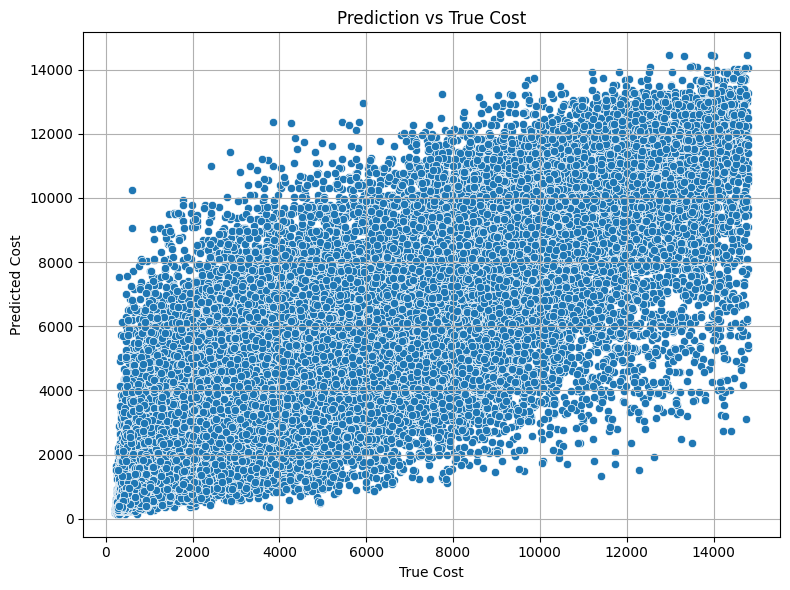

Correlation between True Cost and Predicted Cost: 0.88


In [31]:
# Correlation between true cost and predicted cost, quite high allready, 0.88. Most of deviations are for high costs. Original scale

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_preds_untransformed)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, best_preds_untransformed)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")

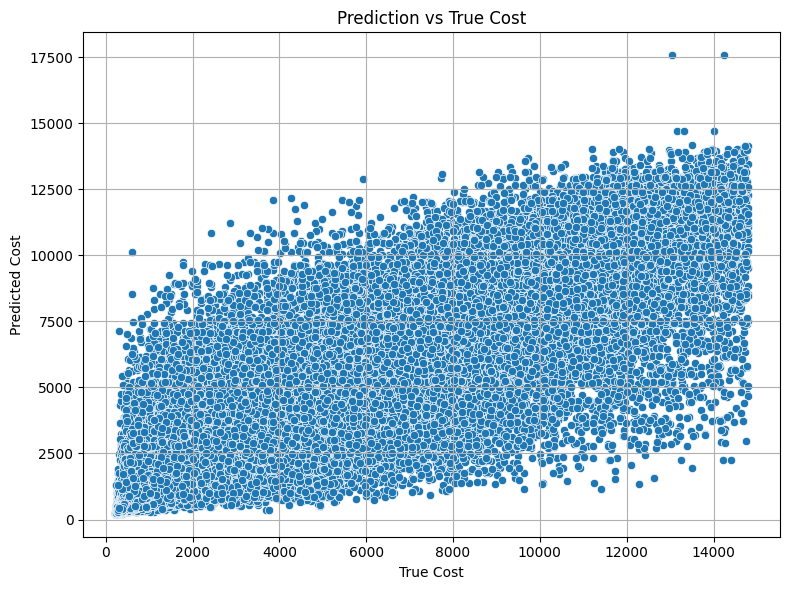

Correlation between True Cost and Predicted Cost: 0.88


In [32]:
# Correlation between true cost and predicted cost, quite high allready. Most of deviations are for high costs. Sqrt scale

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=bayes_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = np.corrcoef(y_test, bayes_preds)[0, 1]
print(f"Correlation between True Cost and Predicted Cost: {correlation:.2f}")